<a href="https://colab.research.google.com/github/Amine-OMRI/Airbnb-Pricing-Prediction-/blob/main/Projet_Data_Science_Prediction_part_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)

In [ ]:
%matplotlib inline
sns.set()

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
plt.rcParams['figure.figsize'] = 15, 5

# Importing Data

In [ ]:
df_listing_preprocessed = pd.read_csv('/content/drive/MyDrive/ML-PROJECT/df_listings_clean_encoded_no_fe.csv')
df_listing_preprocessed.head()                                        

,Unnamed: 0,listing_id,name,description,host_listings_count,host_total_listings_count,host_verifications,latitude,longitude,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_local,host_expeience,amenities_count,revenu,...,property_type_Treehouse,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathrooms_text_0 baths,bathrooms_text_0 shared baths,bathrooms_text_1 bath,bathrooms_text_1 private bath,bathrooms_text_1 shared bath,bathrooms_text_1.5 baths,bathrooms_text_1.5 shared baths,bathrooms_text_2 baths,bathrooms_text_2 shared baths,bathrooms_text_2.5 baths,bathrooms_text_2.5 shared baths,bathrooms_text_23 baths,bathrooms_text_3 baths,bathrooms_text_3 shared baths,bathrooms_text_3.5 baths,bathrooms_text_4 baths,bathrooms_text_4.5 baths,bathrooms_text_5 baths,bathrooms_text_5.5 baths,bathrooms_text_50 baths,bathrooms_text_6 baths,bathrooms_text_6 shared baths,bathrooms_text_6.5 baths,bathrooms_text_6.5 shared baths,bathrooms_text_7 baths,bathrooms_text_7 shared baths,bathrooms_text_7.5 baths,bathrooms_text_8 baths,bathrooms_text_Half-bath,bathrooms_text_Private half-bath,bathrooms_text_Shared half-bath,has_availability_f,has_availability_t,instant_bookable_f,instant_bookable_t
0,0,2577,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",48.86993,2.36251,4,2.0,2.0,"""Dryer"", ""Host greets you"", ""Hot water"", ""Hang...",125.0,3,1125,30,60,90,364,1,0,0,2019-01-02,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,0,0.04,0,12.0,143.0,375.0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,1,3109,zen and calm,<b>The space</b><br />I bedroom appartment in ...,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",48.83349,2.31852,2,1.0,1.0,"""Children\u2019s books and toys"", ""Paid parkin...",60.0,2,30,2,2,2,2,9,0,0,2019-10-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1,0,0,0.19,1,12.0,217.0,120.0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,2,4890,Quiet Historic & Cute +Free Cruise,Stylish & Classic One bedroom apartment for up...,9.0,9.0,"['email', 'phone', 'reviews', 'offline_governm...",48.86409,2.35651,4,1.0,2.0,"""Dryer"", ""Host greets you"", ""Hangers"", ""Iron"",...",69.0,5,120,8,37,67,67,23,1,0,2020-09-07,95.0,10.0,9.0,10.0,10.0,10.0,10.0,14,14,0,0,0.21,1,11.0,144.0,345.0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,3,5396,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...",1.0,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",48.85207,2.35871,2,1.0,1.0,"""Oven"", ""Fire extinguisher"", ""Host greets you""...",62.0,1,1125,30,60,90,90,231,24,0,2020-11-05,90.0,9.0,9.0,9.0,10.0,10.0,8.0,1,1,0,0,1.65,0,11.0,320.0,62.0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,4,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,"VERY CONVENIENT, WITH THE BEST LOCATION !<br /...",3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",48.85758,2.35275,4,2.0,2.0,"""Oven"", ""Paid parking off premises"", ""Hangers""...",53.0,15,130,13,43,73,348,269,7,0,2020-08-15,94.0,10.0,9.0,10.0,10.0,10.0,10.0,3,3,0,0,2.28,1,12.0,389.0,795.0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


In [ ]:
df_listing_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65917 entries, 0 to 65916
Columns: 172 entries, Unnamed: 0 to instant_bookable_t
dtypes: float64(18), int64(149), object(5)
memory usage: 86.5+ MB


In [ ]:
df_listing_preprocessed.columns[:40]

Index(['Unnamed: 0', 'listing_id', 'name', 'description',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'latitude', 'longitude', 'accommodates',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'host_local', 'host_expeience', 'amenities_count', 'revenu'],
      dtype='object')

In [ ]:
df_listing_preprocessed[df_listing_preprocessed.columns[:40]].isna().sum()

Unnamed: 0                                          0
listing_id                                          0
name                                               64
description                                      1443
host_listings_count                                 0
host_total_listings_count                           0
host_verifications                                  0
latitude                                            0
longitude                                           0
accommodates                                        0
bedrooms                                            0
beds                                                0
amenities                                         225
price                                               0
minimum_nights                                      0
maximum_nights                                      0
availability_30                                     0
availability_60                                     0
availability_90             

In [ ]:
df_listing_preprocessed.shape

(65917, 172)

# Pre-processing

##Traiter les valeurs aberrantes


In [ ]:
drop_cols= ['Unnamed: 0', 'listing_id', 'longitude', 'latitude', 
            "amenities_count", "name", "description", 
            "host_listings_count", "host_verifications",
            "amenities", "last_review", "revenu"]  #, 'maximum_nights'
df_listing_preprocessed.drop(drop_cols, axis=1, inplace=True)

In [ ]:
df_airbnb = df_listing_preprocessed.astype(float)
df_airbnb.isna().sum()

host_total_listings_count                           0
accommodates                                        0
bedrooms                                            0
beds                                                0
price                                               0
minimum_nights                                      0
maximum_nights                                      0
availability_30                                     0
availability_60                                     0
availability_90                                     0
availability_365                                    0
number_of_reviews                                   0
number_of_reviews_ltm                               0
number_of_reviews_l30d                              0
review_scores_rating                                0
review_scores_accuracy                              0
review_scores_cleanliness                           0
review_scores_checkin                               0
review_scores_communication 

In [ ]:
list(set(list(df_listing_preprocessed.columns)) - set(list(df_airbnb.columns)))

[]

In [ ]:
df_airbnb.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65917 entries, 0 to 65916
Data columns (total 160 columns):
 #   Column                                            Dtype  
---  ------                                            -----  
 0   host_total_listings_count                         float64
 1   accommodates                                      float64
 2   bedrooms                                          float64
 3   beds                                              float64
 4   price                                             float64
 5   minimum_nights                                    float64
 6   maximum_nights                                    float64
 7   availability_30                                   float64
 8   availability_60                                   float64
 9   availability_90                                   float64
 10  availability_365                                  float64
 11  number_of_reviews                                 float64
 12  num

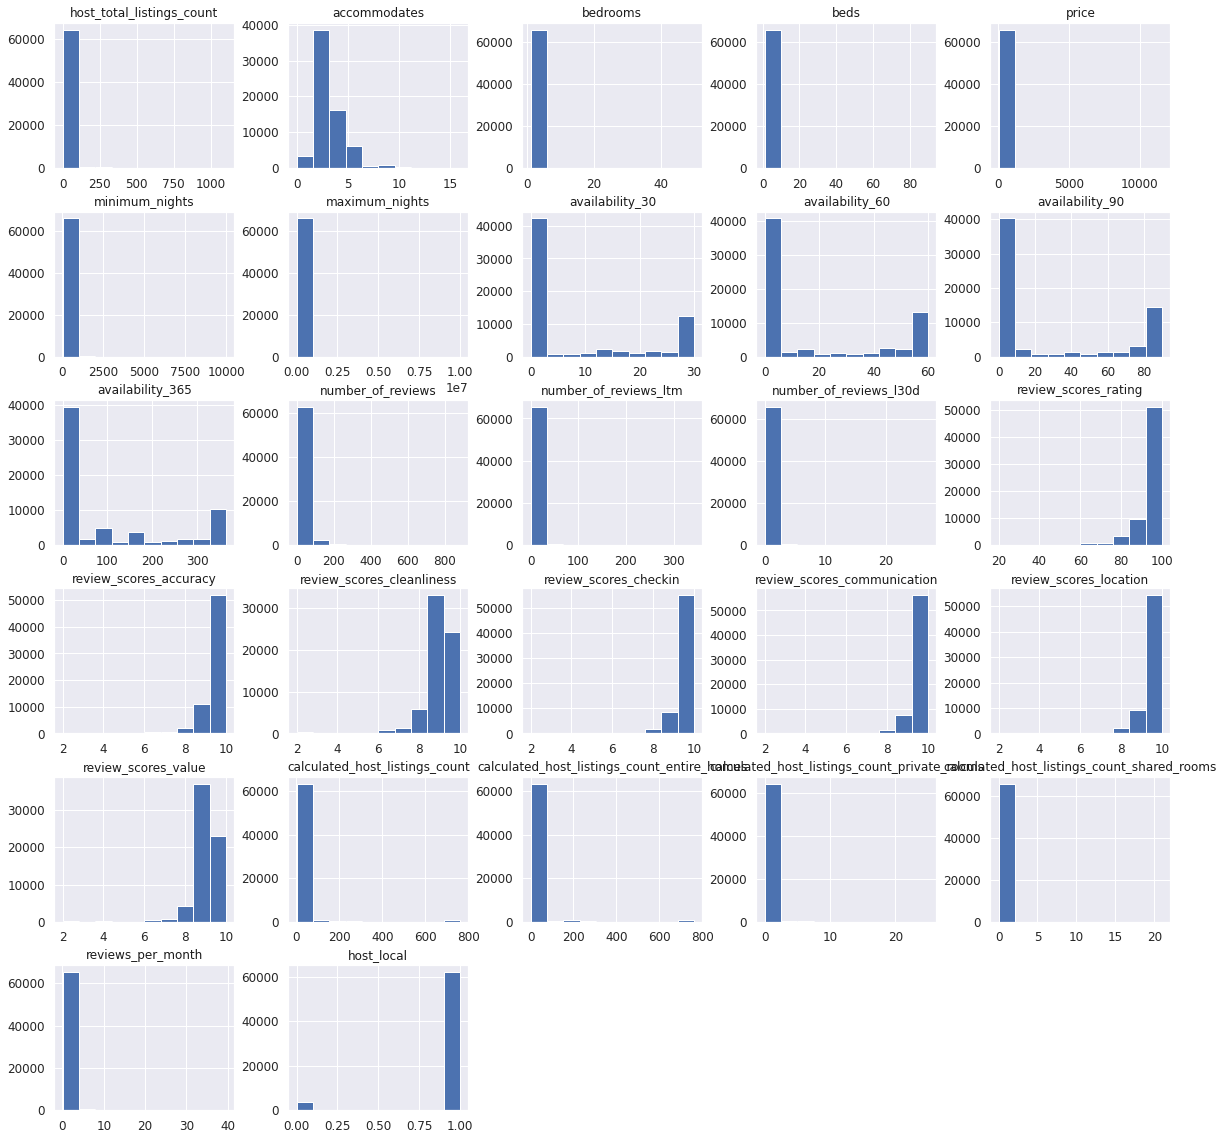

In [ ]:
df_listing_preprocessed.loc[:,df_listing_preprocessed.columns[:27]].hist(figsize=(20,20));

In [ ]:
df_airbnb.shape

(65917, 160)

##vérification des valeurs aberrantes par la méthode IQR interquartiles

In [ ]:
(df_airbnb.describe(include='all').T).round(decimals=3)

,count,mean,std,min,25%,50%,75%,max
host_total_listings_count,65917.0,11.604,71.579,0.00,1.00,1.00,2.00,1105.00
accommodates,65917.0,3.047,1.589,0.00,2.00,2.00,4.00,16.00
bedrooms,65917.0,1.294,0.859,1.00,1.00,1.00,1.00,50.00
beds,65917.0,1.696,1.272,1.00,1.00,1.00,2.00,90.00
price,65917.0,114.352,220.132,8.00,60.00,80.00,120.00,11600.00
minimum_nights,65917.0,5.656,44.280,1.00,1.00,2.00,4.00,9999.00
maximum_nights,65917.0,851.959,38954.032,1.00,30.00,1125.00,1125.00,10000000.00
availability_30,65917.0,8.170,11.860,0.00,0.00,0.00,18.00,30.00
availability_60,65917.0,17.602,24.647,0.00,0.00,0.00,44.00,60.00
availability_90,65917.0,27.620,37.785,0.00,0.00,0.00,74.00,90.00


In [ ]:
# Vérifiez si chaque valeur de mySeries se situe dans la plage des valeurs aberrantes.
# Si la valeur est supérieure à upperOutlier, cochez la case True
# Si la valeur est inférieure à la valeur lowerOutlier, cochez la case Vrai
# renvoie le nombre total de valeurs aberrantes pour cette série.
def numberOfOutliers(mySeries, upperOutlier, lowerOutlier):
    return sum((mySeries > upperOutlier.loc[mySeries.name, ]) |\
               (mySeries < lowerOutlier.loc[mySeries.name,]))

def outlier_stats(df):
    numericDescribe = (df.describe(include='all').T).round(decimals=3)
    
    # Calculer les valeurs aberrantes à l'aide de la formule suivante : premier 
    # quartile - 1,5-IQR > valeur aberrante > troisième quartile + 1,5-IQR
    numericDescribe['IQR'] = numericDescribe['75%'] - numericDescribe['25%']
    numericDescribe['outliers'] = (numericDescribe['max'] > (numericDescribe['75%'] + (1.5 * numericDescribe['IQR']))) \
                            | (numericDescribe['min'] < (numericDescribe['25%'] - (1.5 * numericDescribe['IQR'])))
    
    # Calculer l'IQR pour chaque colonne de la base de données
    IQR = df.quantile(.75) - df.quantile(.25)
    
    #  Calculer les valeurs aberrantes upperOutlier et lowerOutlier
    upperOutlier = df.quantile(.75) + (1.5 * (IQR))
    lowerOutlier = df.quantile(.25) - (1.5 * (IQR))
    
    # Enregistrer le résultat dans une nouvelle colonne
    numericDescribe['num_outliers'] = df.apply(numberOfOutliers, args=(upperOutlier, lowerOutlier))
    numericDescribe.sort_values('num_outliers', ascending=False, inplace=True)
    newColOrder = ['count', 'outliers', 'num_outliers', 'IQR', 'mean', 'std', \
               'min', '25%', '50%', '75%', 'max']
    numericDescribe = numericDescribe.reindex(columns=newColOrder)
    
    return numericDescribe

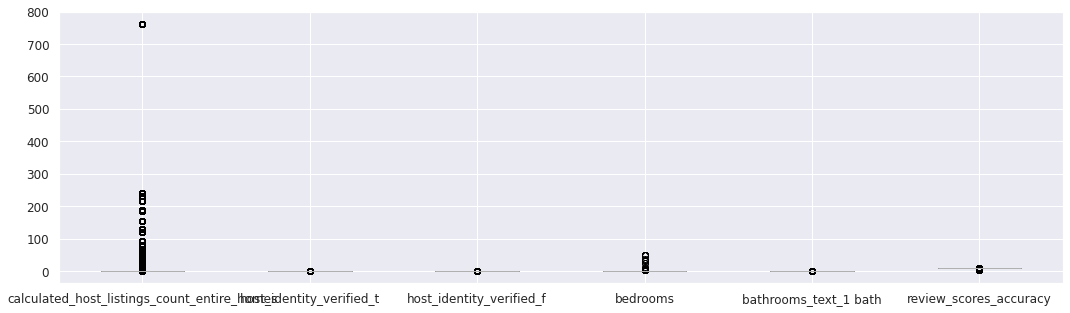

In [ ]:
df_airbnb.boxplot(["calculated_host_listings_count_entire_homes","host_identity_verified_t",
                   "host_identity_verified_f","bedrooms","bathrooms_text_1 bath", "review_scores_accuracy"],figsize=(18,5))

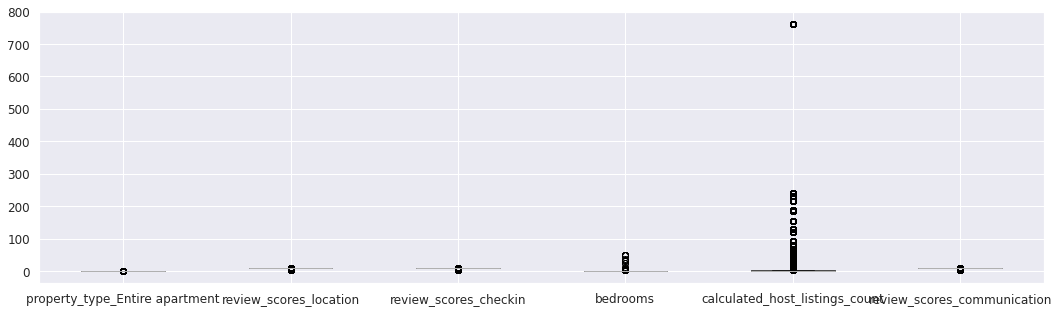

In [ ]:
df_airbnb.boxplot(["property_type_Entire apartment","review_scores_location",
                   "review_scores_checkin","bedrooms","calculated_host_listings_count",
                   "review_scores_communication"],figsize=(18,5))

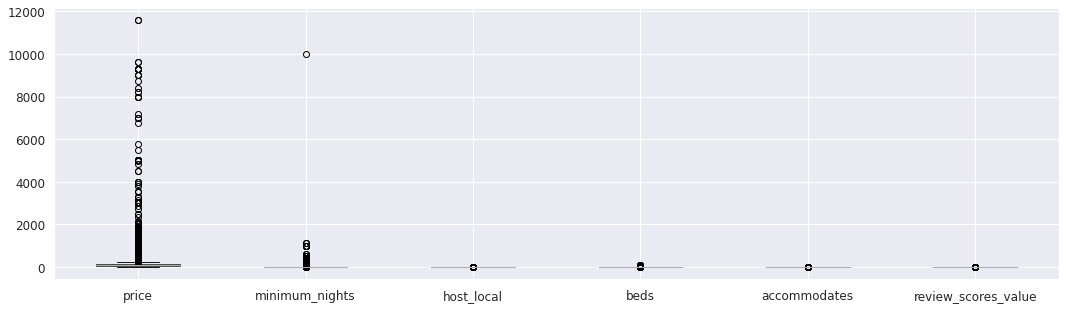

In [ ]:
df_airbnb.boxplot(["price","minimum_nights", "host_local","beds","accommodates",
                   "review_scores_value"],figsize=(18,5))

In [ ]:
outlier_stats_df = outlier_stats(df_airbnb)
outlier_stats_df

,count,outliers,num_outliers,IQR,mean,std,min,25%,50%,75%,max
calculated_host_listings_count_entire_homes,65917.0,True,19875,0.00,15.981,86.073,0.00,1.00,1.00,1.00,762.00
host_identity_verified_t,65917.0,True,15334,0.00,0.767,0.423,0.00,1.00,1.00,1.00,1.00
host_identity_verified_f,65917.0,True,15334,0.00,0.233,0.423,0.00,0.00,0.00,0.00,1.00
bathrooms_text_1 bath,65917.0,True,14783,0.00,0.776,0.417,0.00,1.00,1.00,1.00,1.00
review_scores_accuracy,65917.0,True,14119,0.00,9.701,0.745,2.00,10.00,10.00,10.00,10.00
bedrooms,65917.0,True,13782,0.00,1.294,0.859,1.00,1.00,1.00,1.00,50.00
property_type_Entire apartment,65917.0,True,13156,0.00,0.800,0.400,0.00,1.00,1.00,1.00,1.00
review_scores_location,65917.0,True,11604,0.00,9.766,0.616,2.00,10.00,10.00,10.00,10.00
review_scores_checkin,65917.0,True,10933,0.00,9.765,0.678,2.00,10.00,10.00,10.00,10.00
calculated_host_listings_count,65917.0,True,10018,1.00,16.427,86.018,1.00,1.00,1.00,2.00,762.00


- Ici calculated_host_listings_count_entire_homes contient beaucoup de valeurs aberrantes 19875, pour s'assurer que nos modèles fonctionneront bien, donc je vais la supprimer.

In [ ]:
drop_more_cols = ['host_total_listings_count',
                  'calculated_host_listings_count_entire_homes',
                  'calculated_host_listings_count_private_rooms',
                  'availability_365']
df_airbnb.drop(drop_more_cols, axis=1, inplace=True)
outlier_stats(df_airbnb)

,count,outliers,num_outliers,IQR,mean,std,min,25%,50%,75%,max
host_identity_verified_t,65917.0,True,15334,0.00,0.767,0.423,0.00,1.00,1.00,1.00,1.00
host_identity_verified_f,65917.0,True,15334,0.00,0.233,0.423,0.00,0.00,0.00,0.00,1.00
bathrooms_text_1 bath,65917.0,True,14783,0.00,0.776,0.417,0.00,1.00,1.00,1.00,1.00
review_scores_accuracy,65917.0,True,14119,0.00,9.701,0.745,2.00,10.00,10.00,10.00,10.00
bedrooms,65917.0,True,13782,0.00,1.294,0.859,1.00,1.00,1.00,1.00,50.00
property_type_Entire apartment,65917.0,True,13156,0.00,0.800,0.400,0.00,1.00,1.00,1.00,1.00
review_scores_location,65917.0,True,11604,0.00,9.766,0.616,2.00,10.00,10.00,10.00,10.00
review_scores_checkin,65917.0,True,10933,0.00,9.765,0.678,2.00,10.00,10.00,10.00,10.00
calculated_host_listings_count,65917.0,True,10018,1.00,16.427,86.018,1.00,1.00,1.00,2.00,762.00
review_scores_communication,65917.0,True,9771,0.00,9.788,0.663,2.00,10.00,10.00,10.00,10.00


In [ ]:
# from scipy import stats
# test = df_airbnb[(np.abs(stats.zscore(df_airbnb)) < 3).all(axis=1)]
# # outlier_stats(test)

In [ ]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

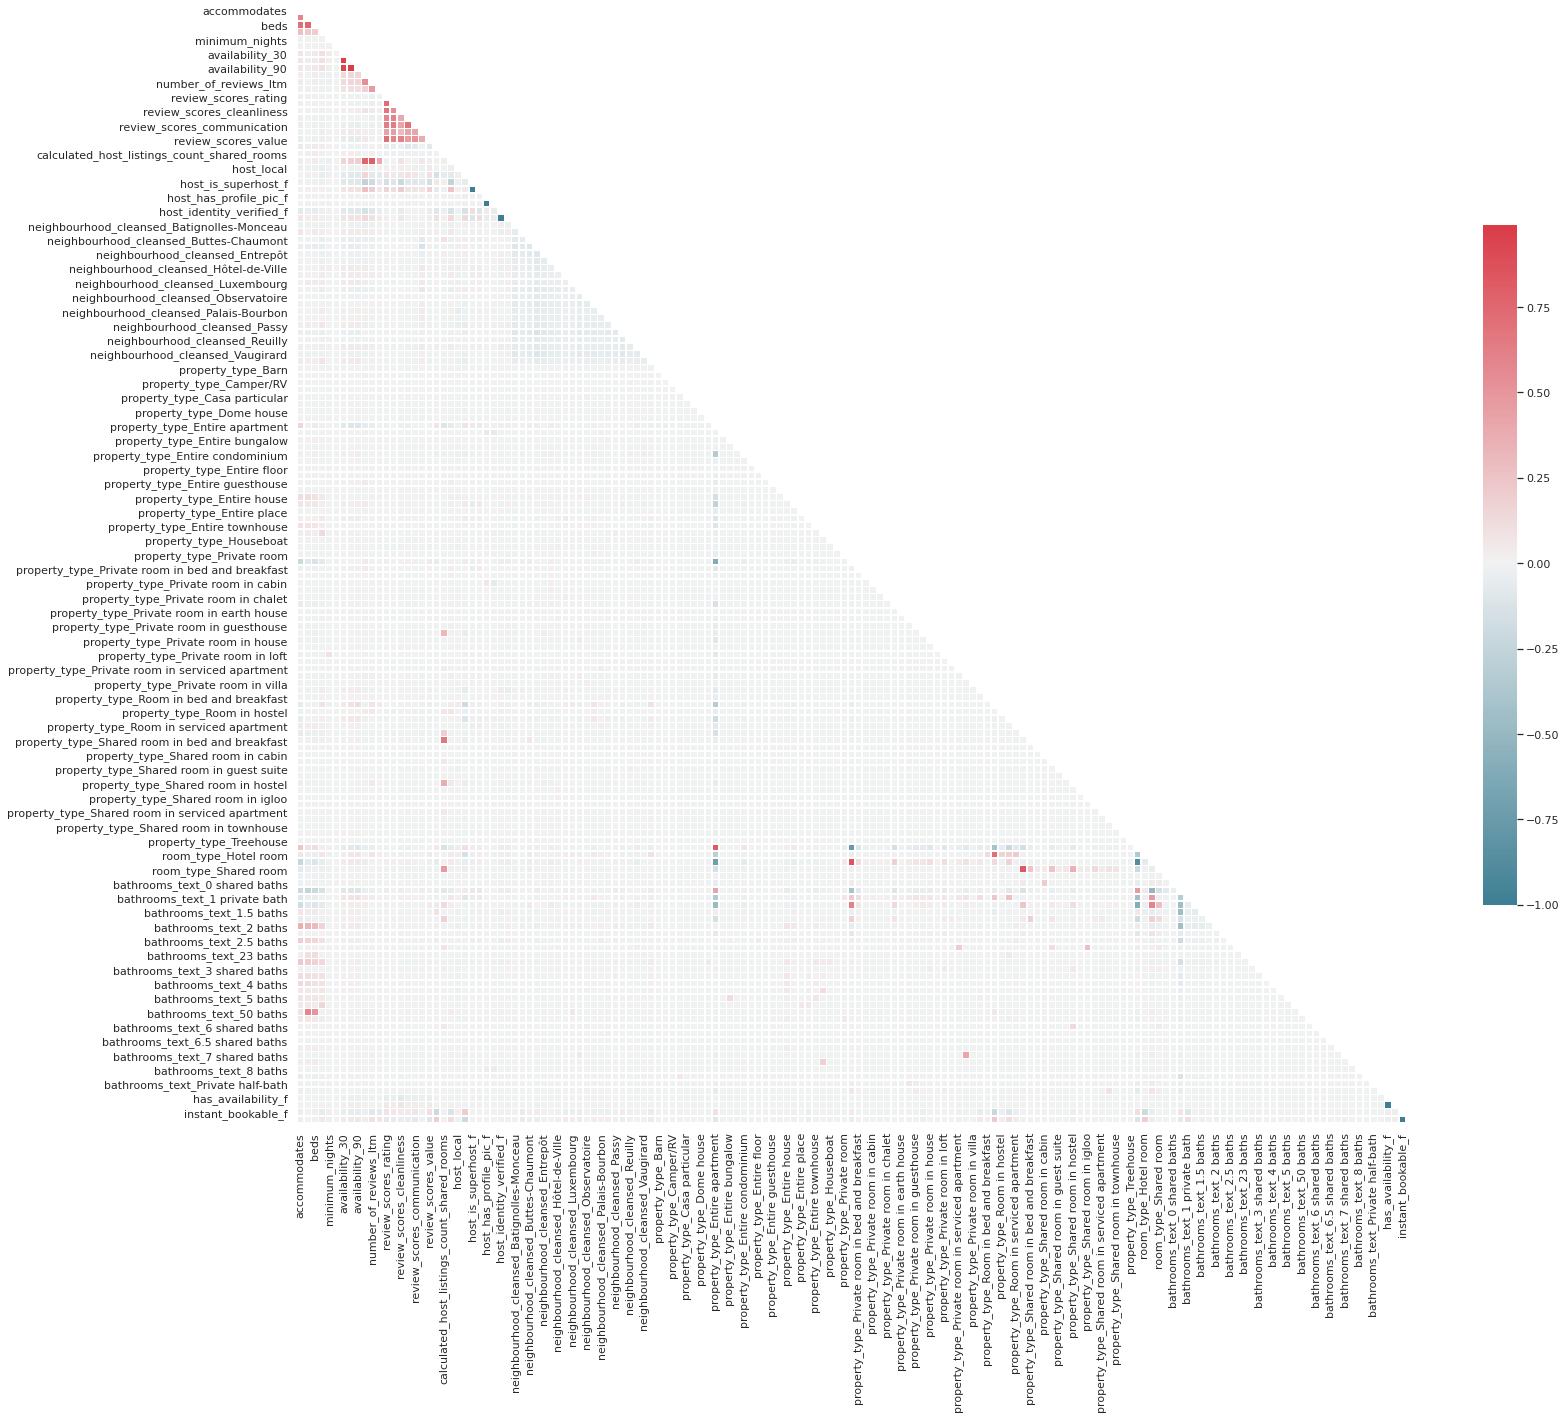

In [ ]:
multi_collinearity_heatmap(df_airbnb, figsize=(25,25))

In [ ]:
df_airbnb.drop(['calculated_host_listings_count', 
                'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

- Celles-ci seront fortement corrélées avec la colonne **availability_90** et seront donc supprimées.

In [ ]:
df_airbnb.drop(['availability_30', 'availability_60'], axis=1, inplace=True)

- Celles-ci seront fortement corrélées avec la colonne **number_of_reviews** et seront donc supprimées.



In [ ]:
df_airbnb.drop(['number_of_reviews_ltm', 'reviews_per_month'], axis=1, inplace=True)

- Il ne semble pas y avoir de relations colinéaires significatives avec les variables de voisinage, donc celles-ci seront temporairement abandonnées pour produire une carte heatmap plus claire pour les features restantes :

In [ ]:
neighbourhood_cols = list(df_airbnb.columns[df_airbnb.columns.str.startswith('neighbourhood')])

- Sans les colonnes neighbourhood_...

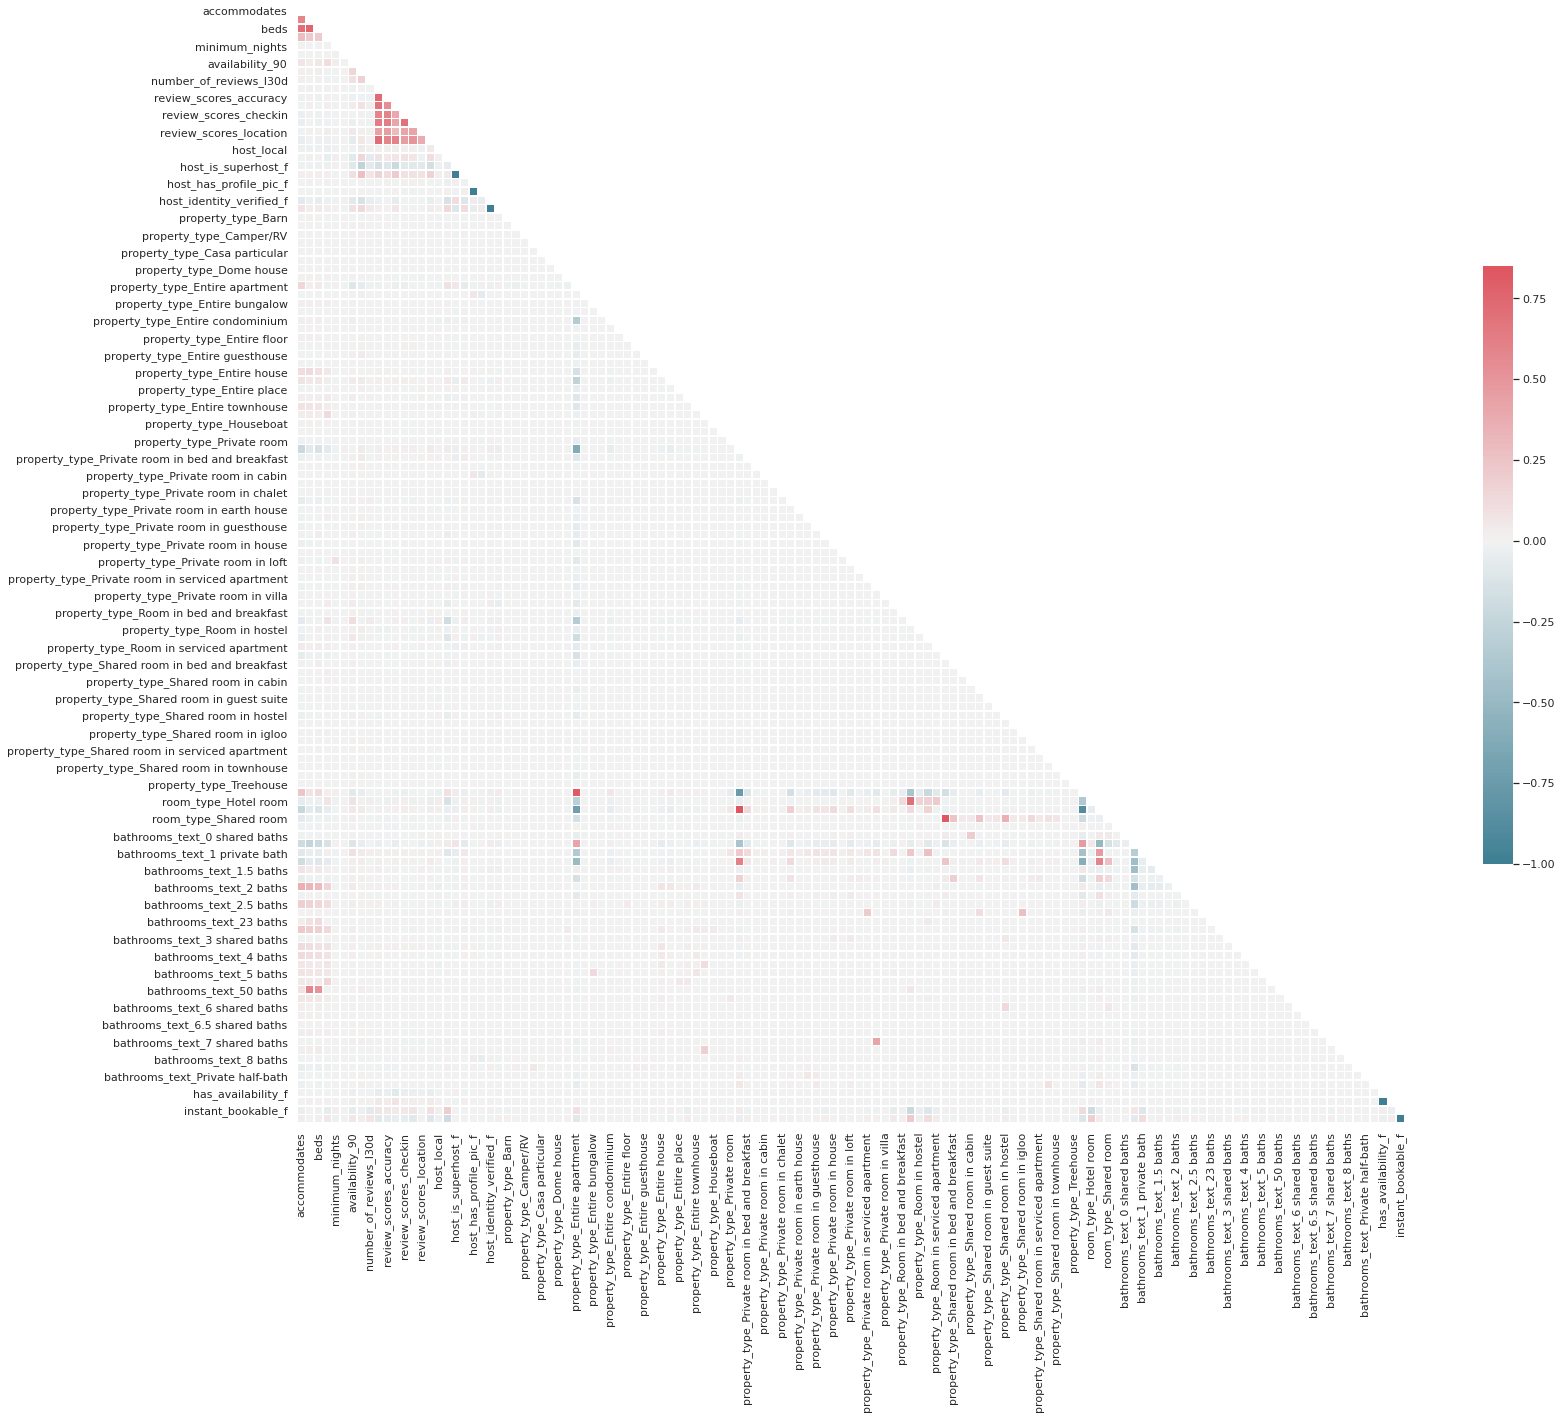

In [ ]:
multi_collinearity_heatmap(df_airbnb.drop(list(neighbourhood_cols), axis=1), figsize=(25,22))

- Il existe une forte corrélation négative entre **property_type_House** et **property_type_Entire_Apartment**, et entre **room_type_Private_room** et **room_type_Entire_home/apt** .

In [ ]:
property_type_cols = list(df_airbnb.columns[df_airbnb.columns.str.startswith('property_')])

In [ ]:
neighbourhood_cols+property_type_cols

- Sans les colonnes neighbourhood_... et les colonnes property_type_...

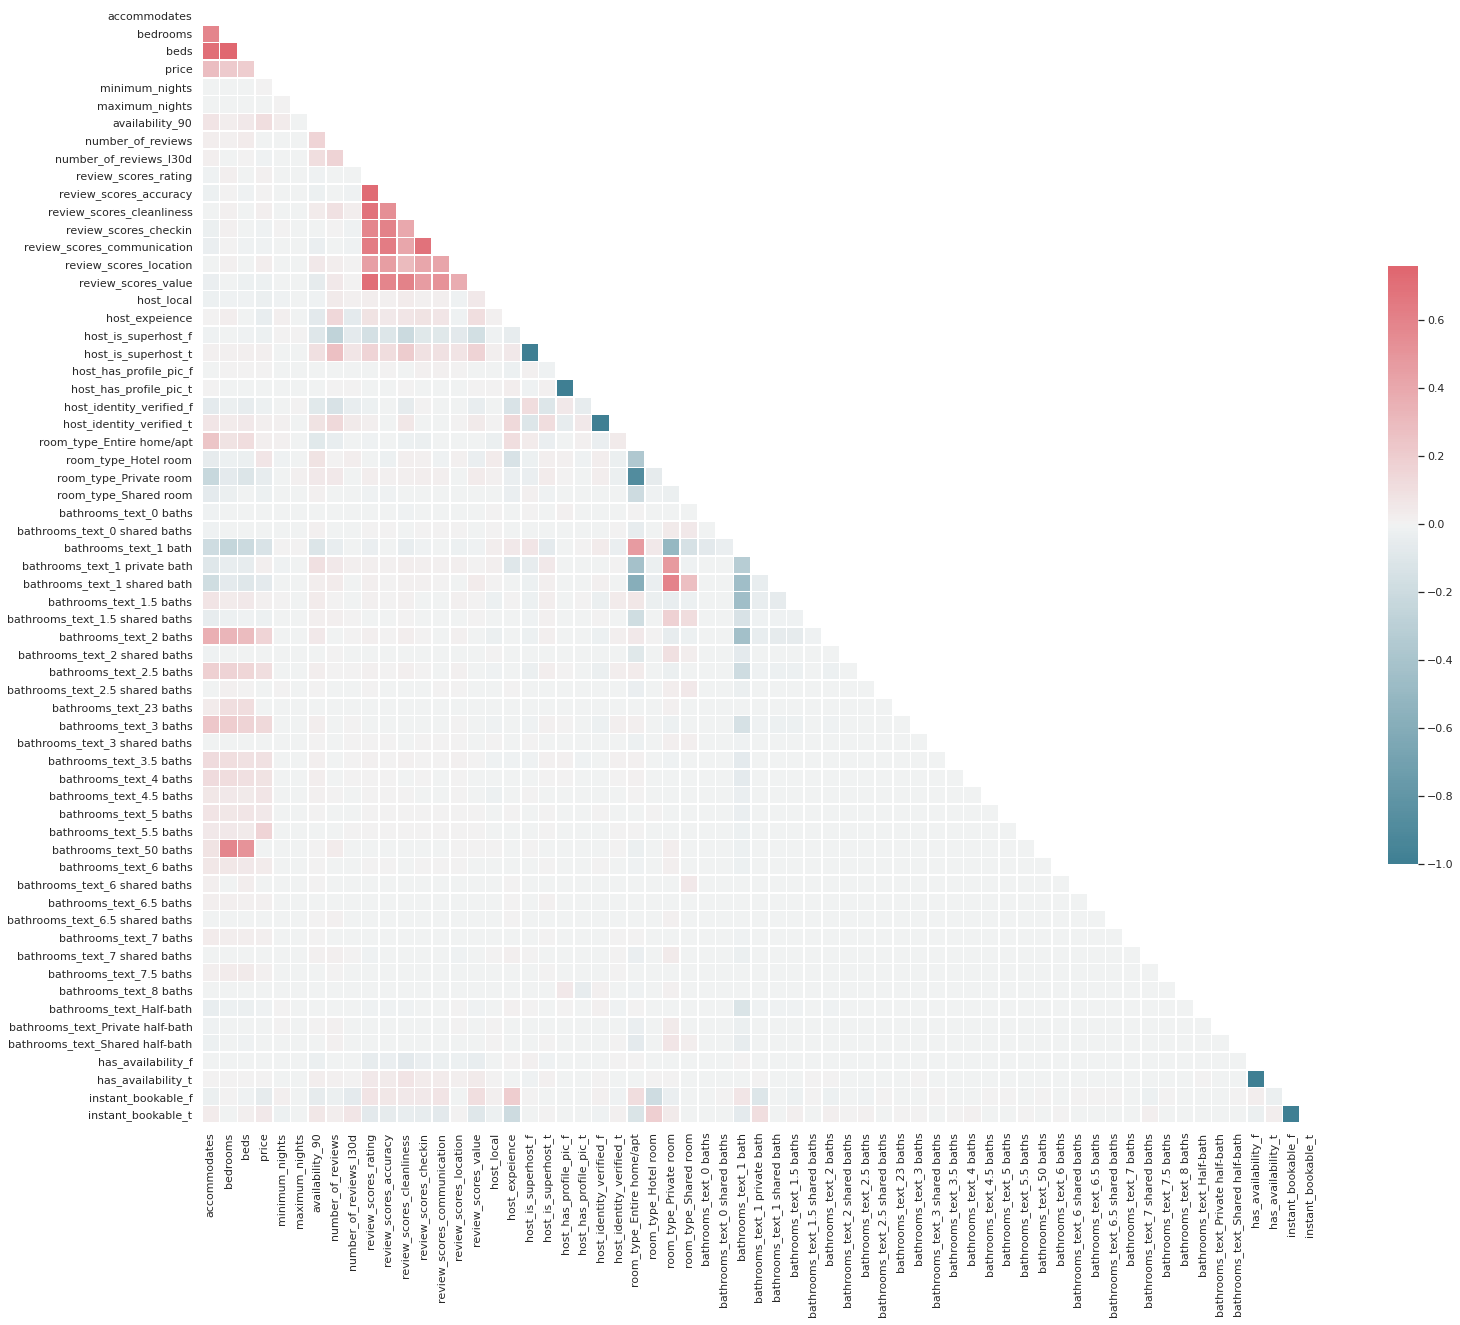

In [ ]:
multi_collinearity_heatmap(df_airbnb.drop(list(neighbourhood_cols+property_type_cols), axis=1), figsize=(25,22))

- Les zones de multi-collinéarité :

  - **beds**, **bedrooms** et **accommodates** sont fortement corrélés. Le nombre de personnes hébergées est traditionnellement un paramètre de recherche plus prioritaire sur Airbnb, car il est plus pertinent pour les chambres privées et partagées plus que la colonne bedrooms (qui reste le deuxième paramètre de recherche le plus prioritaire sur le site, après les dates.

In [ ]:
# Dropping collinear features
to_drop = ['beds',
           'bedrooms',
           'property_type_Entire apartment',
           'room_type_Private room']
df_airbnb.drop(to_drop, axis=1, inplace=True)

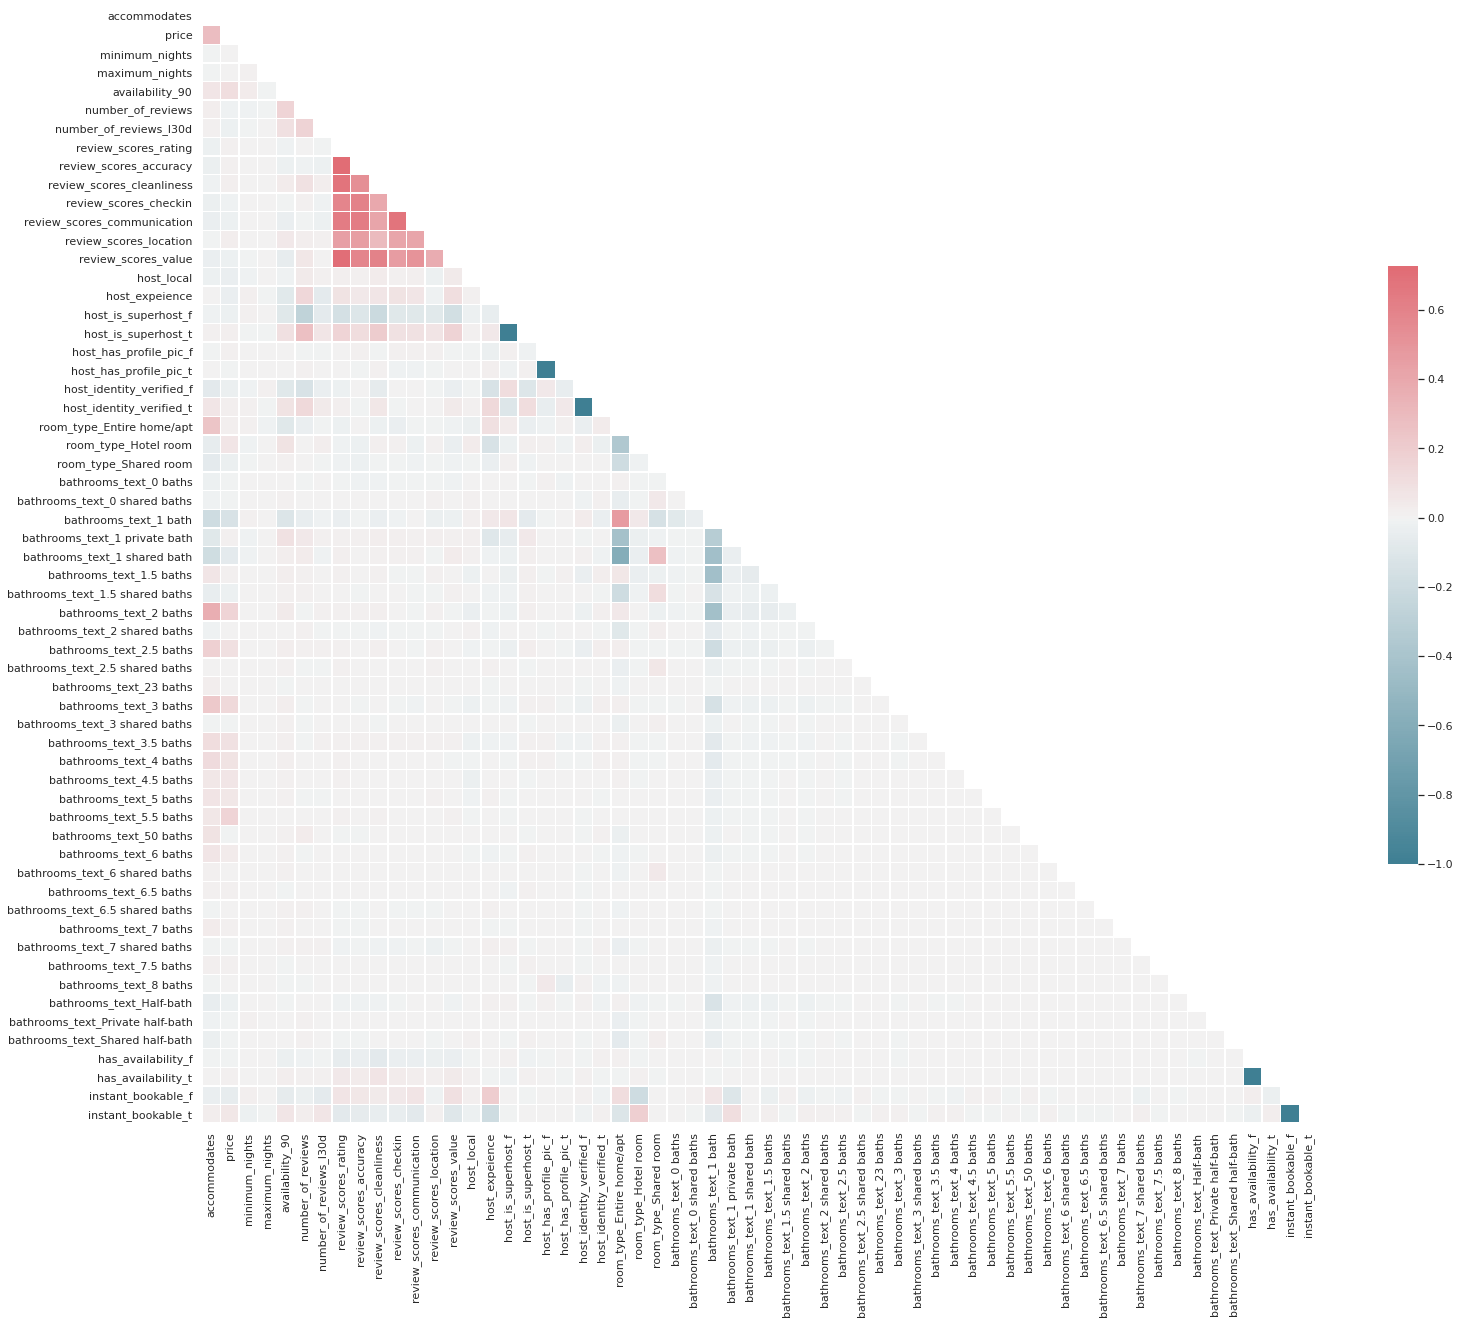

In [ ]:
neighbourhood_cols = list(df_airbnb.columns[df_airbnb.columns.str.startswith('neighbourhood')])
property_type_cols = list(df_airbnb.columns[df_airbnb.columns.str.startswith('property_')])
multi_collinearity_heatmap(df_airbnb.drop(list(neighbourhood_cols+property_type_cols), axis=1), figsize=(25,22))

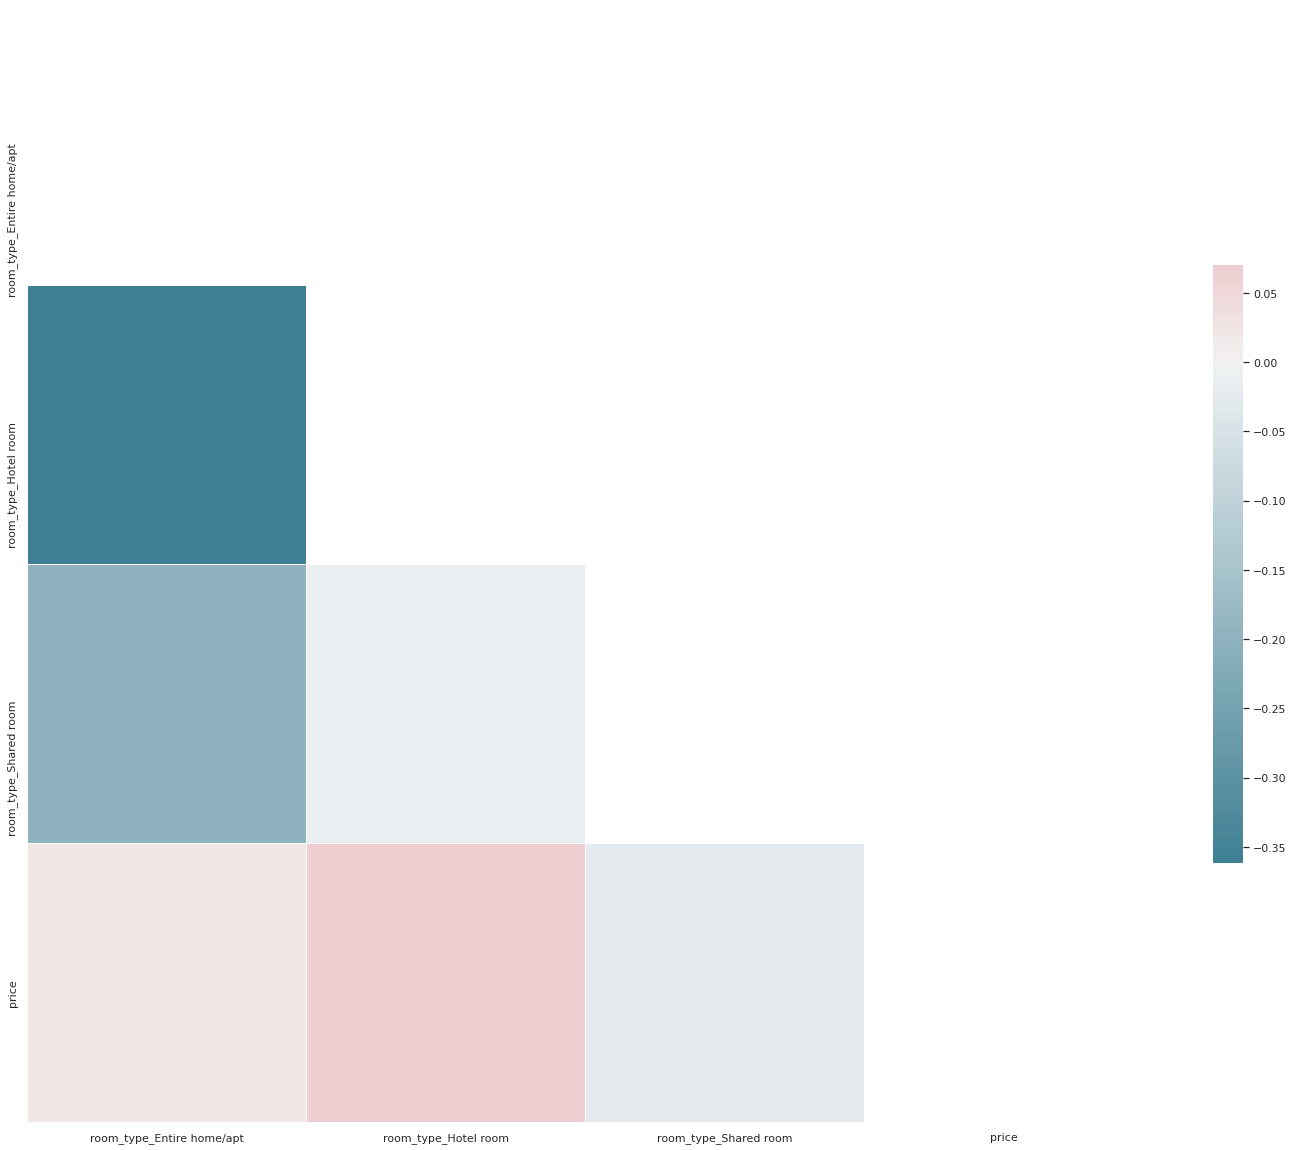

In [ ]:
neighbourhood_cols = list(df_airbnb.columns[df_airbnb.columns.str.startswith('room_ty')])
neighbourhood_cols.append('price')
multi_collinearity_heatmap(df_airbnb[neighbourhood_cols], figsize=(25,22))

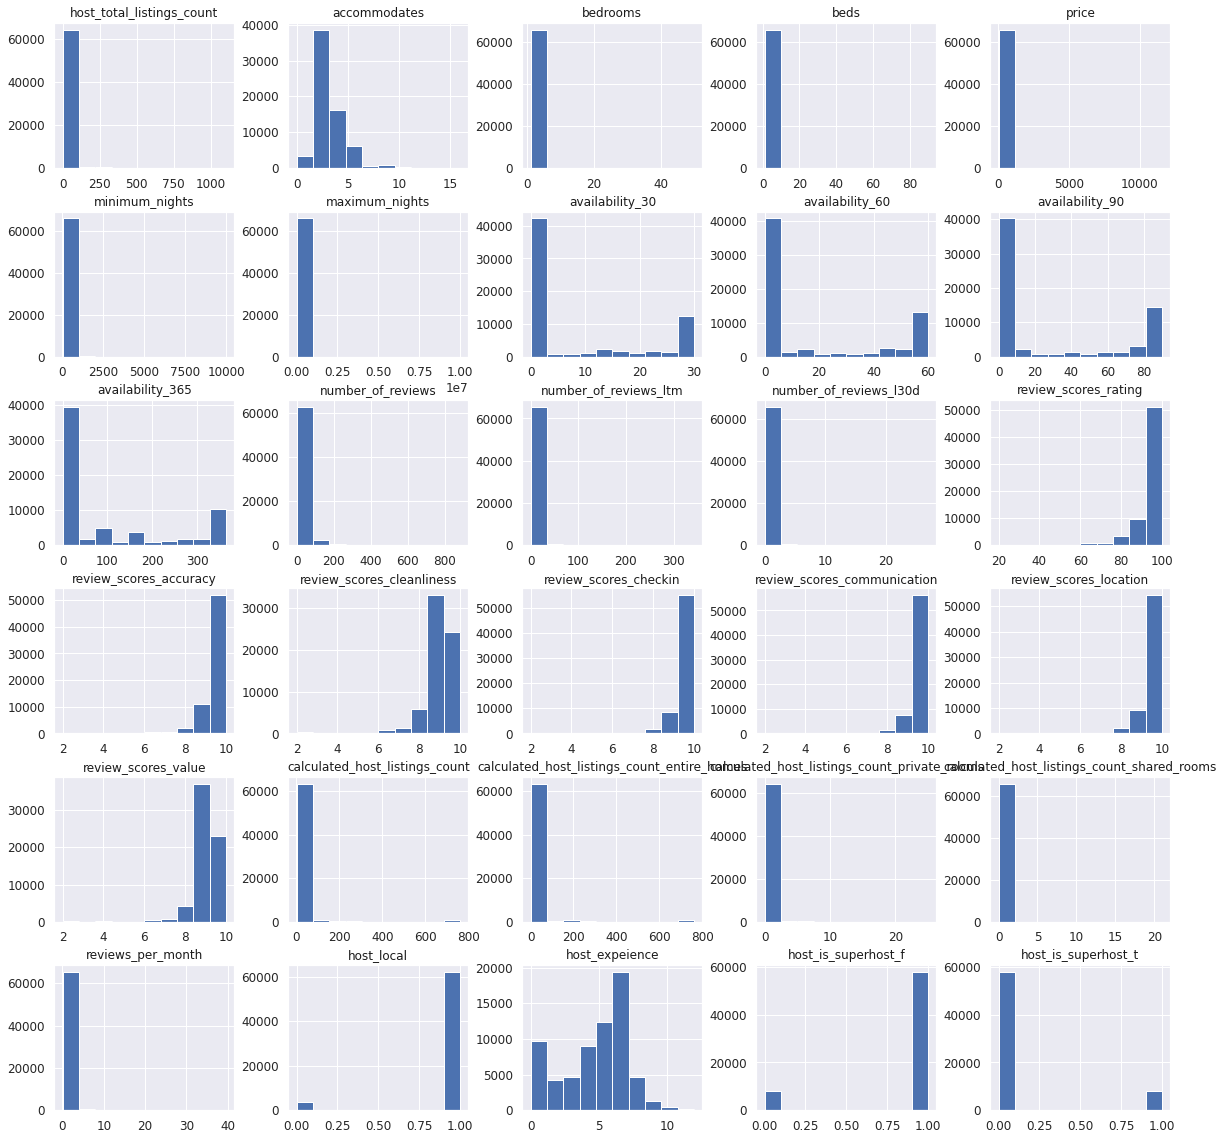

In [ ]:
df_listing_preprocessed.loc[:,df_listing_preprocessed.columns[:30]].hist(figsize=(20,20));

- 
Normalisation et standardisation
À l'exception de **accommodates** et de **host_experience**, les autres features numériques sont toutes asymétriques et pourraient bénéficier d'une transformation logarithmique

In [ ]:
df_listing_preprocessed.loc[:,df_listing_preprocessed.columns[30:60]].hist(figsize=(20,20));

In [ ]:
df_listing_preprocessed.loc[:,df_listing_preprocessed.columns[60:90]].hist(figsize=(20,20));

- Appiquer une transformatoin logarithmique pour se rapprocher d'une loi normale et d'une courbe symérique

In [ ]:
df = df_airbnb.copy()

In [ ]:
for col in df.columns:
  if (col != 'accommodates') | (col != 'host_expeience'):
    df[col] = df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    df[col] = np.log(df[col])

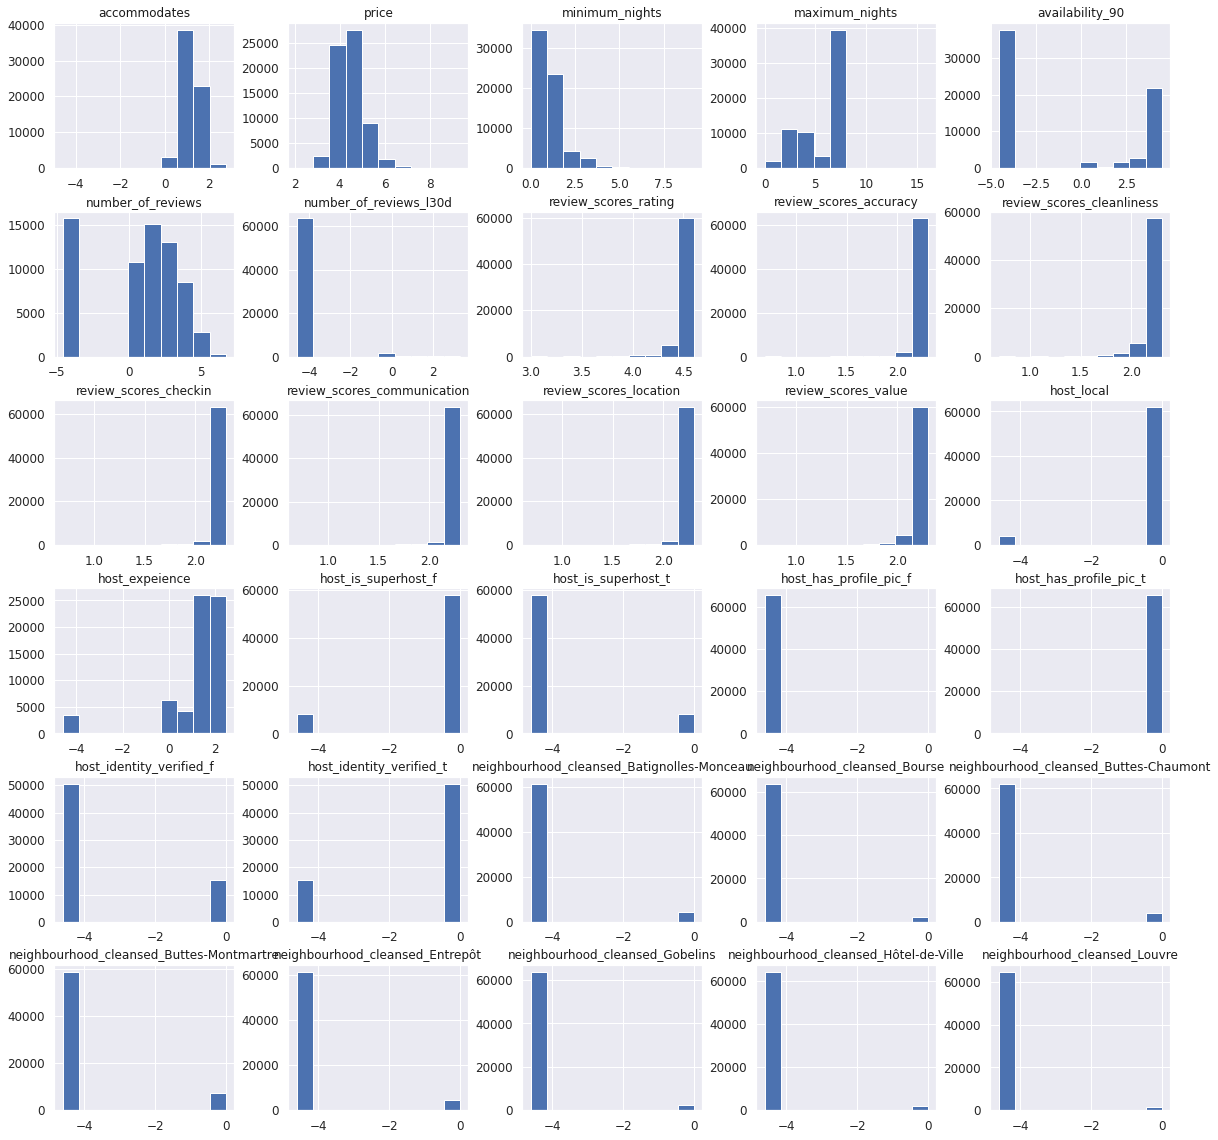

In [ ]:
df[df.columns[:30]].hist(figsize=(20,20));

#Standardising et normalising


##StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

# Separating X and y
X = df.drop('price', axis=1)
y = df.price

# Scaling
X = pd.DataFrame(standard_scaler.fit_transform(X), columns=list(X.columns))

In [ ]:
scaled_df[['price','accommodates', 'number_of_reviews','availability_90',
           'host_expeience', 'minimum_nights', 'maximum_nights',
           'review_scores_rating', 'host_local']].hist(figsize=(10,11));

##MinMaxScaler


In [ ]:
selected_feature_df = df.loc[:,['accommodates', 'price', 'minimum_nights', 'maximum_nights',  'availability_90',
 'number_of_reviews', 'bathrooms_text_0 baths', 'bathrooms_text_0 shared baths',
 'bathrooms_text_1 private bath', 'bathrooms_text_1 shared bath', 'room_type_Hotel room',
 'bathrooms_text_1.5 baths', 'bathrooms_text_1.5 shared baths', 'bathrooms_text_2 baths',
 'bathrooms_text_2 shared baths', 'bathrooms_text_2.5 baths', 'bathrooms_text_2.5 shared baths',
 'bathrooms_text_23 baths', 'bathrooms_text_3 baths', 'bathrooms_text_3 shared baths',
 'bathrooms_text_3.5 baths', 'bathrooms_text_4 baths', 'bathrooms_text_4.5 baths',
 'bathrooms_text_5 baths', 'bathrooms_text_5.5 baths', 'bathrooms_text_50 baths', 
 'bathrooms_text_6 baths', 'bathrooms_text_6 shared baths', 'bathrooms_text_6.5 baths',
 'bathrooms_text_6.5 shared baths', 'bathrooms_text_7 baths', 'bathrooms_text_7 shared baths', 
 'bathrooms_text_7.5 baths', 'bathrooms_text_8 baths', 'bathrooms_text_Half-bath', 
 'bathrooms_text_Private half-bath', 'bathrooms_text_Shared half-bath','property_type_Barn', 
 'property_type_Boat', 'property_type_Camper/RV', 'property_type_Campsite', 'property_type_Casa particular',
 'property_type_Cave', 'property_type_Dome house', 'property_type_Earth house', 
 'property_type_Entire bed and breakfast', 'property_type_Entire bungalow', 'property_type_Entire chalet', 
 'property_type_Entire condominium', 'property_type_Entire cottage', 'property_type_Entire floor',
 'property_type_Entire guest suite', 'property_type_Entire guesthouse', 'property_type_Entire home/apt',
 'property_type_Entire house', 'property_type_Entire loft', 'property_type_Entire place',
 'property_type_Entire serviced apartment', 'property_type_Entire townhouse', 'property_type_Entire villa',
 'property_type_Houseboat', 'property_type_Island', 'property_type_Private room',
 'property_type_Private room in apartment', 'property_type_Private room in bed and breakfast', 
 'property_type_Private room in boat', 'property_type_Private room in cabin', 'property_type_Private room in casa particular', 
 'property_type_Private room in chalet', 'property_type_Private room in condominium',
 'property_type_Private room in earth house', 'property_type_Private room in guest suite',
 'property_type_Private room in guesthouse', 'property_type_Private room in hostel', 
 'property_type_Private room in house', 'property_type_Private room in houseboat', 
 'property_type_Private room in loft', 'property_type_Private room in nature lodge',
 'property_type_Private room in serviced apartment', 'property_type_Private room in townhouse',
 'property_type_Private room in villa', 'property_type_Room in aparthotel', 'property_type_Room in bed and breakfast',
 'property_type_Room in boutique hotel', 'property_type_Room in hostel', 'property_type_Room in hotel',
 'property_type_Room in serviced apartment', 'property_type_Shared room in apartment', 
 'property_type_Shared room in bed and breakfast', 'property_type_Shared room in boutique hotel',
 'property_type_Shared room in cabin', 'property_type_Shared room in condominium', 
 'property_type_Shared room in guest suite', 'property_type_Shared room in guesthouse',
 'property_type_Shared room in hostel', 'property_type_Shared room in house', 'property_type_Shared room in igloo',
 'property_type_Shared room in loft', 'property_type_Shared room in serviced apartment',
 'property_type_Shared room in tiny house', 'property_type_Shared room in townhouse', 
 'property_type_Tiny house', 'property_type_Treehouse', 
 'room_type_Entire home/apt']]   

In [ ]:
selected_feature_df.shape

(65917, 69)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Separating X and y
X = df.drop('price', axis=1)
y = df.price

# Scaling
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns=list(X.columns))

##RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

# Separating X and y
X = df.drop('price', axis=1)
y = df.price

# Scaling
X = pd.DataFrame(robust_scaler.fit_transform(X), columns=list(X.columns))

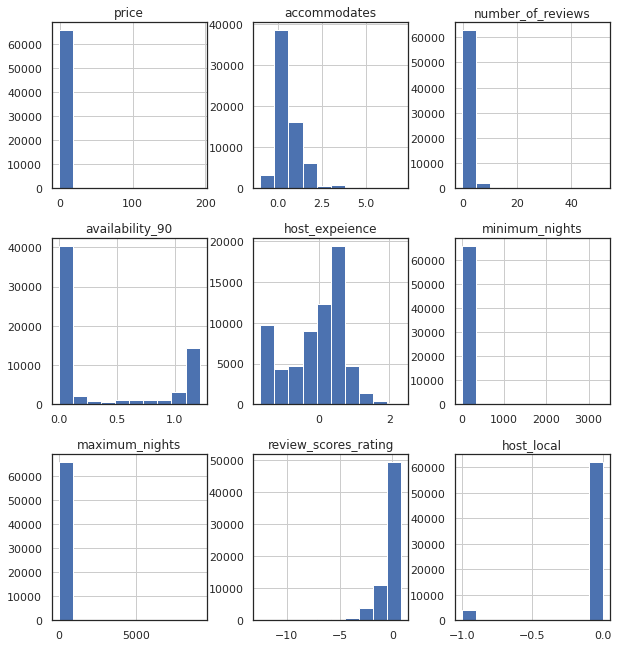

In [ ]:
scaled_final_df[['price','accommodates', 'number_of_reviews','availability_90',
           'host_expeience', 'minimum_nights', 'maximum_nights',
           'review_scores_rating', 'host_local']].hist(figsize=(10,11));

#Train_test_split

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

#Multiple linear regression

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)

regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation RMSE:", round(mean_squared_error(y_test, y_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_pred),4))


Training RMSE: 0.1899
Validation RMSE: 3.1530349975250116e+16

Training r2: 0.5167
Validation r2: -7.935876666838192e+16


In [ ]:
y_test_array = np.array(list(y_test))
y_pred_array = np.array(y_pred)
result_df = pd.DataFrame({'Actual': y_test_array.flatten(), 'Predicted': y_pred_array.flatten()})
result_df

#En utlisant statsmodels

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     519.7
Date:                Thu, 25 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:22:24   Log-Likelihood:                -43204.
No. Observations:               65917   AIC:                         8.662e+04
Df Residuals:                   65813   BIC:                         8.756e+04
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6155      0.104     15.538      0.000       1.412       1.819
x1             3.4345      0.032    106.322      0.000       3.371       3.498
x2            -0.1771      0.019     -9.264      0.000      -0.215      -0.140
x3             0.1259      0.015      8.422      0.000       0.097       0.155
x4             0.1928      0.004     47.646      0.000       0.185       0.201
x5            -0.0894      0.007    -13.309      0.000      -0.103      -0.076
x6            -0.1083      0.043     -2.538      0.011      -0.192      -0.025
x7             0.1104      0.096      1.150      0.250      -0.078       0.299
x8             0.2117      0.017     12.624      0.000       0.179       0.245
x9             0.0137      0.014      0.997      0.319      -0.013       0.041
x10            0.4157      0.025     16.851      0.000       0.367       0.464
x11            0.1702      0.008     20.860      0.000       0.154       0.186
x12           -0.0163      0.027     -0.599      0.549      -0.070       0.037
x13            0.5788      0.009     65.453      0.000       0.561       0.596
x14           -0.0156      0.052     -0.303      0.762      -0.117       0.085
x15            0.6890      0.018     38.264      0.000       0.654       0.724
x16            0.0089      0.139      0.064      0.949      -0.264       0.282
x17           -0.8401      0.467     -1.798      0.072      -1.756       0.076
x18            0.8927      0.024     37.232      0.000       0.846       0.940
x19           -0.4212      0.191     -2.202      0.028      -0.796      -0.046
x20            1.0949      0.049     22.572      0.000       1.000       1.190
x21            1.0563      0.053     19.850      0.000       0.952       1.161
x22            1.1246      0.096     11.708      0.000       0.936       1.313
x23            1.0602      0.096     11.010      0.000       0.871       1.249
x24            2.1141      0.156     13.551      0.000       1.808       2.420
x25           -1.7867      0.178    -10.041      0.000      -2.136      -1.438
x26            0.9490      0.135      7.017      0.000       0.684       1.214
x27           -0.8555      0.471     -1.815      0.069      -1.779       0.068
x28            1.6240      0.466      3.482      0.000       0.710       2.538
x29           -0.2272      0.467     -0.487      0.626      -1.142       0.687
x30            1.0191      0.269      3.782      0.000       0.491       1.547
x31           -0.8617      0.143     -6.026      0.000      -1.142      -0.581
x32           -0.0278      0.336     -0.083      0.934      -0.686       0.630
x33           -0.1839      0.330     -0.557      0.577      -0.831       0.463
x34           -0.2585      0.027     -9.431      0.000      -0.312      -0.205
x35           -0.0549      0.125     -0.438      0.661      -0.301       0.191
x3

#RIDGE REGRESSION

In [ ]:
#Ridge
from sklearn.linear_model import Ridge
regressor_ridge = Ridge(alpha=1.0)
regressor_ridge.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor_ridge.predict(X_test)
y_train_pred = regressor_ridge.predict(X_train)

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation RMSE:", round(mean_squared_error(y_test, y_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_pred),4))


Training RMSE: 0.1901
Validation RMSE: 0.1898

Training r2: 0.5163
Validation r2: 0.5222


#LASSO REGRESSION

In [ ]:
#lasso
from sklearn.linear_model import Lasso
regressor_lasso = Lasso(alpha = 0.000001)
regressor_lasso.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor_lasso.predict(X_test)
y_train_pred = regressor_lasso.predict(X_train)

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation RMSE:", round(mean_squared_error(y_test, y_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_pred),4))


Training RMSE: 0.1899
Validation RMSE: 0.1898

Training r2: 0.5167
Validation r2: 0.5222


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3677.9127216272436, tolerance: 2.071984430837169
  positive)


#Gradient boosted decision trees

- Le Boosting est une technique d'ensembling où de nouveaux modèles sont ajoutés pour corriger les erreurs commises par les modèles existants. Les modèles sont ajoutés de manière séquentielle jusqu'à ce qu'aucune autre amélioration ne puisse être apportée. Un exemple populaire est l'algorithme AdaBoost qui pondère les points de données qui sont difficiles à prévoir.

- Le Gradient boosting est une approche qui consiste à créer de nouveaux modèles qui prédisent les résidus ou les erreurs des modèles précédents, puis à les additionner pour obtenir la prédiction finale. Elle est appelée "gradient boosting" parce qu'elle utilise un algorithme de descente de gradient pour minimiser la perte lors de l'ajout de nouveaux modèles.

- XGBoost (eXtreme Gradient Boosting) est une implémentation d'arbres de décision à gradient boosté conçue pour la vitesse et la performance. Il s'agit d'un algorithme très populaire qui a récemment dominé l'apprentissage machine appliqué pour les données structurées ou tabulaires

In [ ]:
import xgboost as xgb
# Create instace
xgb_reg = xgb.XGBRegressor()

# Fit the model on training data
xgb_reg.fit(X_train, y_train)

training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

[22:42:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training MSE: 0.1827
Validation MSE: 0.1843

Training r2: 0.5351
Validation r2: 0.5361


#Features inmportance

- En plus de ses performances supérieures, l'utilisation d'ensembles de méthodes d'arbres de décision comme le gradient boosting présente l'avantage de pouvoir fournir automatiquement des estimations de l'importance des caractéristiques à partir d'un modèle prédictif entraîné.

- En général, l'importance fournit un score qui indique l'utilité ou la valeur de chaque caractéristique dans la construction des arbres de décision renforcés au sein du modèle. Plus un feature est utilisé pour prendre des décisions clés avec les arbres de décision, plus son importance relative est élevée.

- Cette importance est calculée explicitement pour chaque feature dans l'ensemble de données, ce qui permet de classer et de comparer les features entre eux.


In [ ]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X.columns)
ft_weights_xgb_reg.sort_values('weight', ascending=False, inplace=True)
ft_weights_xgb_reg.head(10)

,weight
accommodates,0.100498
bathrooms_text_1 bath,0.098532
property_type_Room in boutique hotel,0.077138
bathrooms_text_1.5 baths,0.061842
property_type_Private room in apartment,0.050967
bathrooms_text_2 baths,0.048008
review_scores_location,0.036277
bathrooms_text_1 shared bath,0.033581
neighbourhood_cleansed_Buttes-Chaumont,0.030292
availability_90,0.029302


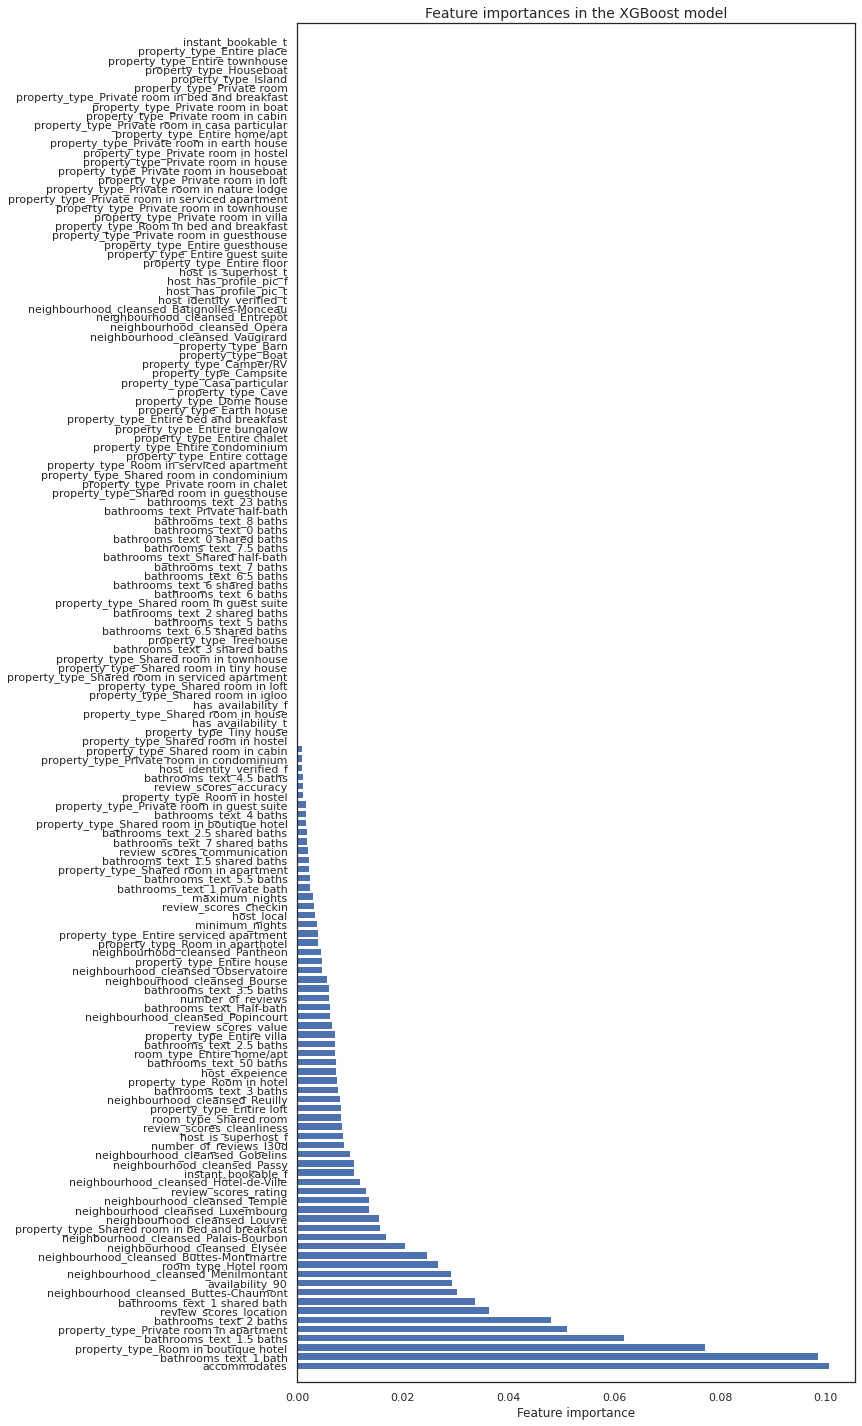

In [ ]:
# Plotting feature importances
plt.figure(figsize=(10,25))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

#TESTER AVEC LES FEATURE SELECTIONNER

In [ ]:
ft_weights_xgb_reg.index[:68]

Index(['accommodates', 'bathrooms_text_1 bath',
       'property_type_Room in boutique hotel', 'bathrooms_text_1.5 baths',
       'property_type_Private room in apartment', 'bathrooms_text_2 baths',
       'review_scores_location', 'bathrooms_text_1 shared bath',
       'neighbourhood_cleansed_Buttes-Chaumont', 'availability_90',
       'neighbourhood_cleansed_Ménilmontant', 'room_type_Hotel room',
       'neighbourhood_cleansed_Buttes-Montmartre',
       'neighbourhood_cleansed_Élysée',
       'neighbourhood_cleansed_Palais-Bourbon',
       'property_type_Shared room in bed and breakfast',
       'neighbourhood_cleansed_Louvre', 'neighbourhood_cleansed_Luxembourg',
       'neighbourhood_cleansed_Temple', 'review_scores_rating',
       'neighbourhood_cleansed_Hôtel-de-Ville', 'instant_bookable_f',
       'neighbourhood_cleansed_Passy', 'neighbourhood_cleansed_Gobelins',
       'number_of_reviews_l30d', 'host_is_superhost_f',
       'review_scores_cleanliness', 'room_type_Shared room',


In [ ]:
selected_feature_df = df.loc[:,['price', 'accommodates', 'bathrooms_text_1 bath',
       'property_type_Room in boutique hotel', 'bathrooms_text_1.5 baths',
       'property_type_Private room in apartment', 'bathrooms_text_2 baths',
       'review_scores_location', 'bathrooms_text_1 shared bath',
       'neighbourhood_cleansed_Buttes-Chaumont', 'availability_90',
       'neighbourhood_cleansed_Ménilmontant', 'room_type_Hotel room',
       'neighbourhood_cleansed_Buttes-Montmartre',
       'neighbourhood_cleansed_Élysée',
       'neighbourhood_cleansed_Palais-Bourbon',
       'property_type_Shared room in bed and breakfast',
       'neighbourhood_cleansed_Louvre', 'neighbourhood_cleansed_Luxembourg',
       'neighbourhood_cleansed_Temple', 'review_scores_rating',
       'neighbourhood_cleansed_Hôtel-de-Ville', 'instant_bookable_f',
       'neighbourhood_cleansed_Passy', 'neighbourhood_cleansed_Gobelins',
       'number_of_reviews_l30d', 'host_is_superhost_f',
       'review_scores_cleanliness', 'room_type_Shared room',
       'property_type_Entire loft', 'neighbourhood_cleansed_Reuilly',
       'bathrooms_text_3 baths', 'property_type_Room in hotel',
       'host_expeience', 'bathrooms_text_50 baths',
       'room_type_Entire home/apt', 'bathrooms_text_2.5 baths',
       'property_type_Entire villa', 'review_scores_value',
       'neighbourhood_cleansed_Popincourt', 'bathrooms_text_Half-bath',
       'number_of_reviews', 'bathrooms_text_3.5 baths',
       'neighbourhood_cleansed_Bourse', 'neighbourhood_cleansed_Observatoire',
       'property_type_Entire house', 'neighbourhood_cleansed_Panthéon',
       'property_type_Room in aparthotel',
       'property_type_Entire serviced apartment', 'minimum_nights',
       'host_local', 'review_scores_checkin', 'maximum_nights',
       'bathrooms_text_1 private bath', 'bathrooms_text_5.5 baths',
       'property_type_Shared room in apartment',
       'bathrooms_text_1.5 shared baths', 'review_scores_communication',
       'bathrooms_text_7 shared baths', 'bathrooms_text_2.5 shared baths',
       'property_type_Shared room in boutique hotel', 'bathrooms_text_4 baths',
       'property_type_Private room in guest suite',
       'property_type_Room in hostel', 'review_scores_accuracy',
       'bathrooms_text_4.5 baths', 'host_identity_verified_f',
       'property_type_Private room in condominium',
       'property_type_Shared room in cabin']]

In [ ]:
selected_feature_df.shape

(65917, 69)

##RL

In [ ]:
      
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Separating X and y
X = selected_feature_df.drop('price', axis=1)
y = selected_feature_df.price

# Scaling
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns=list(X.columns))

from sklearn.model_selection import train_test_split, cross_val_score 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Fitting Multiple Linear Regression to the Training set
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)

regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation RMSE:", round(mean_squared_error(y_test, y_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_pred),4))


Training RMSE: 0.1914
Validation RMSE: 0.191

Training r2: 0.5128
Validation r2: 0.5193


## RIDGE

In [ ]:
#Ridge
from sklearn.linear_model import Ridge
regressor_ridge = Ridge(alpha=1.0)
regressor_ridge.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor_ridge.predict(X_test)
y_train_pred = regressor_ridge.predict(X_train)

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation RMSE:", round(mean_squared_error(y_test, y_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_pred),4))



Training RMSE: 0.1915
Validation RMSE: 0.191

Training r2: 0.5125
Validation r2: 0.5193


##LASSO

In [ ]:
#lasso
from sklearn.linear_model import Lasso
regressor_lasso = Lasso(alpha = 0.000001)
regressor_lasso.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor_lasso.predict(X_test)
y_train_pred = regressor_lasso.predict(X_train)

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation RMSE:", round(mean_squared_error(y_test, y_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_pred),4))


Training RMSE: 0.1914
Validation RMSE: 0.191

Training r2: 0.5128
Validation r2: 0.5193


##XGB

In [ ]:
import xgboost as xgb
# Create instace
xgb_reg = xgb.XGBRegressor()

# Fit the model on training data
xgb_reg.fit(X_train, y_train)

training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

[22:04:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training MSE: 0.1827
Validation MSE: 0.1843

Training r2: 0.5351
Validation r2: 0.5361


#Fusionner le dataset données extrait dans la partie feature engineering du [notebook d'analyse](https://colab.research.google.com/drive/1uhD_5FoPi-Ip7l9eYFkvlIRgFUE9AHuc#scrollTo=Ujz3fy8qhzYo&uniqifier=14) de données, avec ce jeu de données

In [ ]:
import gc
gc.collect()

129

In [ ]:
merged_df = pd.read_csv('/content/drive/MyDrive/ML-PROJECT/merged_df.csv')
merged_df.head()

,Unnamed: 0,amenities_dryer,amenities_host_greets_you,amenities_hot_water,amenities_hangers,amenities_iron,amenities_wifi,amenities_dedicated_workspace,amenities_heating,amenities_tv,amenities_washer,amenities_essentials,amenities_kitchen,amenities_childrenu2019s_books_and_toys,amenities_paid_parking_off_premises,amenities_smart_lock,amenities_hair_dryer,amenities_luggage_dropoff_allowed,amenities_smoke_alarm,amenities_cable_tv,amenities_shampoo,amenities_oven,amenities_fire_extinguisher,amenities_stove,amenities_refrigerator,amenities_dishes_and_silverware,amenities_long_term_stays_allowed,amenities_bed_linens,amenities_extra_pillows_and_blankets,amenities_cooking_basics,amenities_coffee_maker,amenities_microwave,amenities_carbon_monoxide_alarm,amenities_elevator,amenities_first_aid_kit,amenities_shower_gel,amenities_building_staff,amenities_indoor_fireplace,amenities_dishwasher,amenities_breakfast,...,welcome,well,west,whatever,whip,white,whole,wide,wifi,willing,window,wine,winter,wipe,wireless,wish,wishing,within,woman,wonderful,wont,wood,wooded,wooden,work,working,workshop,workspace,world,worry,worth,worthy,write,writer,yard,year,yoga,young,zola,zone
0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.120403,0.110281,0.0,0.0,0.0,0.0,0.0,0.0,0.107441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.146541,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.139384,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
outlier_stats(merged_df)

,count,outliers,num_outliers,IQR,mean,std,min,25%,50%,75%,max
amenities_washer,65917.0,True,15863,0.0,0.759,0.427,0.0,1.0,1.0,1.0,1.0
host_verification_by_government_id,65917.0,True,15834,0.0,0.760,0.427,0.0,1.0,1.0,1.0,1.0
amenities_carbon_monoxide_alarm,65917.0,True,15516,0.0,0.235,0.424,0.0,0.0,0.0,0.0,1.0
double,65917.0,True,15421,0.0,0.028,0.065,0.0,0.0,0.0,0.0,1.0
amenities_cable_tv,65917.0,True,15113,0.0,0.229,0.420,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
amenities_microwave,65917.0,False,0,1.0,0.345,0.475,0.0,0.0,0.0,1.0,1.0
amenities_elevator,65917.0,False,0,1.0,0.377,0.485,0.0,0.0,0.0,1.0,1.0
host_verification_by_offline_government_id,65917.0,False,0,1.0,0.479,0.500,0.0,0.0,0.0,1.0,1.0
host_verification_by_identity_manual,65917.0,False,0,1.0,0.290,0.454,0.0,0.0,0.0,1.0,1.0


- Supprimer la colonne **price** qui est crée lors de lencodage de la colonne **description**

In [ ]:
merged_df.drop(['Unnamed: 0'],axis=1,inplace=True)
merged_df.rename(columns={'price': 'price_in_desc'}, inplace=True)

In [ ]:
merged_df.columns[merged_df.columns.str.contains("Una")]

Index([], dtype='object')

In [ ]:
# merger les deux dataset celui apre le Min-Max scaling et celui contenant les 
# données de la partie feature engineering
final_df = pd.concat([selected_feature_df, merged_df], axis='columns')

In [ ]:
final_df.shape

(65917, 2673)

In [ ]:
del merged_df
import gc
gc.collect()

9

##RL

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

# Separating X and y
X = final_df.drop('price', axis=1)
y = final_df.price

# Scaling
X = pd.DataFrame(min_max_scaler.fit_transform(X), columns=list(X.columns))

from sklearn.model_selection import train_test_split, cross_val_score 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Fitting Multiple Linear Regression to the Training set
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)

regressor.fit(X_train, y_train)
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation RMSE:", round(mean_squared_error(y_test, y_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_pred),4))


Training RMSE: 0.1504
Validation RMSE: 2.8569801186007695e+18

Training r2: 0.6172
Validation r2: -7.190735871508386e+18


In [ ]:
gc.collect()

186

## RIDGE

In [ ]:
#Ridge
from sklearn.linear_model import Ridge
regressor_ridge = Ridge(alpha=1.0)
regressor_ridge.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor_ridge.predict(X_test)
y_train_pred = regressor_ridge.predict(X_train)

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation RMSE:", round(mean_squared_error(y_test, y_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_pred),4))



Training RMSE: 0.1424
Validation RMSE: 0.1567

Training r2: 0.6376
Validation r2: 0.6056


##LASSO

In [ ]:
#lasso
from sklearn.linear_model import Lasso
regressor_lasso = Lasso(alpha = 0.000001)
regressor_lasso.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor_lasso.predict(X_test)
y_train_pred = regressor_lasso.predict(X_train)

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation RMSE:", round(mean_squared_error(y_test, y_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_pred),4))


Training RMSE: 0.1421
Validation RMSE: 0.1572

Training r2: 0.6384
Validation r2: 0.6043


##XGB

In [ ]:
import xgboost as xgb
# Create instace
xgb_reg = xgb.XGBRegressor()

# Fit the model on training data
xgb_reg.fit(X_train, y_train)

training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

[07:39:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

Training MSE: 0.1714
Validation MSE: 0.1783

Training r2: 0.5637
Validation r2: 0.5512


#RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_RandomForest = RandomForestRegressor(n_estimators = 20, random_state = 0)

regressor_RandomForest.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor_RandomForest.predict(X_test)
y_train_pred = regressor_RandomForest.predict(X_train)

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation RMSE:", round(mean_squared_error(y_test, y_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_pred),4))


Training RMSE: 0.0271
Validation RMSE: 0.1774

Training r2: 0.931
Validation r2: 0.5535


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_RandomForest = RandomForestRegressor(n_estimators = 100, random_state = 0)

regressor_RandomForest.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor_RandomForest.predict(X_test)
y_train_pred = regressor_RandomForest.predict(X_train)

# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining RMSE:", round(mean_squared_error(y_train, y_train_pred),4))
print("Validation RMSE:", round(mean_squared_error(y_test, y_pred),4))
print("\nTraining r2:", round(r2_score(y_train, y_train_pred),4))
print("Validation r2:", round(r2_score(y_test, y_pred),4))


Training RMSE: 0.0234
Validation RMSE: 0.1688

Training r2: 0.9403
Validation r2: 0.5753


#ACP

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(df_airbnb)

In [ ]:
features = range(pca.n_components_)
plt.figure(figsize=(18,10))
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()